In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.layers import SimpleRNN, Dense, Dropout, LSTM

In [2]:
dataset = pd.read_csv("./Ethereum.csv")

In [3]:
dataset.head()

SNo        Date  Price   Open   High    Low     Vol.  Change %
0    1  2016-03-10  11.75  11.20  11.85  11.07      0.0      4.91
1    2  2016-03-11  11.95  11.75  11.95  11.75    180.0      1.70
2    3  2016-03-12  12.92  11.95  13.45  11.95    830.0      8.12
3    4  2016-03-13  15.07  12.92  15.07  12.92   1300.0     16.64
4    5  2016-03-14  12.50  15.07  15.07  11.40  92180.0    -17.05

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SNo       1994 non-null   int64  
 1   Date      1994 non-null   object 
 2   Price     1994 non-null   float64
 3   Open      1994 non-null   float64
 4   High      1994 non-null   float64
 5   Low       1994 non-null   float64
 6   Vol.      1994 non-null   float64
 7   Change %  1994 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 124.8+ KB


In [5]:
dataset.describe()

SNo        Price         Open         High          Low  \
count  1994.000000  1994.000000  1994.000000  1994.000000  1994.000000   
mean    997.500000   477.470802   475.825953   495.664338   453.794338   
std     575.762538   700.338364   697.526557   728.813571   663.099119   
min       1.000000     6.700000     6.680000     7.320000     5.860000   
25%     499.250000   122.267500   122.097500   126.710000   116.540000   
50%     997.500000   224.540000   224.395000   230.755000   215.455000   
75%    1495.750000   455.335000   454.745000   469.697500   438.722500   
max    1994.000000  4167.780000  4173.610000  4366.100000  3794.150000   

               Vol.     Change %  
count  1.994000e+03  1994.000000  
mean   5.644993e+06     0.453225  
std    7.949152e+06     5.769802  
min    0.000000e+00   -44.550000  
25%    5.566325e+05    -2.207500  
50%    1.825000e+06     0.130000  
75%    8.617500e+06     3.047500  
max    7.747000e+07    29.510000

In [6]:
dataset.isnull().sum()

SNo         0
Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [7]:
dataset = dataset.drop('SNo', axis = 1)
dataset.tail()

Date    Price     Open     High      Low       Vol.  Change %
1989  2021-08-20  3284.21  3184.83  3300.36  3179.18   739320.0      3.12
1990  2021-08-21  3223.96  3285.12  3307.33  3200.19   768740.0     -1.83
1991  2021-08-22  3238.70  3224.17  3271.94  3128.98   747650.0      0.46
1992  2021-08-23  3319.49  3238.41  3375.42  3231.96  1090000.0      2.49
1993  2021-08-24  3329.47  3322.60  3357.99  3283.80   802790.0      0.30

In [8]:
# Creating a new dataframe to plot the data
data_plot =  pd.DataFrame([])
data_plot['Price'] = dataset['Price']
data_plot['Date'] =  pd.to_datetime(dataset['Date'])
data_plot['Year'] = data_plot['Date'].dt.strftime('%Y')


In [9]:
data_plot.head()

Price       Date  Year
0  11.75 2016-03-10  2016
1  11.95 2016-03-11  2016
2  12.92 2016-03-12  2016
3  15.07 2016-03-13  2016
4  12.50 2016-03-14  2016

<Axes: xlabel='Date', ylabel='Price'>

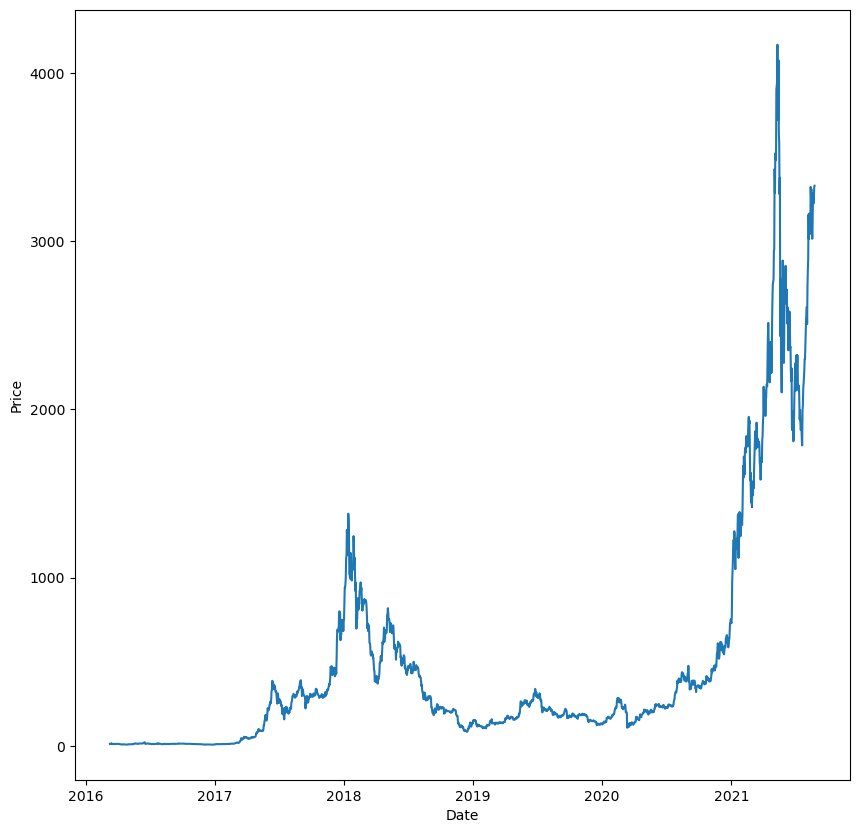

In [10]:
plt.rcParams['figure.figsize'] = [10,10]
sns.lineplot(x = data_plot['Date'], y = data_plot['Price'])


In [11]:
# Choosing all the dates before July 2018
# dataset2 = dataset[dataset['Date'] < '2018-07-12']
dataset2 = dataset[(dataset['Date'] > '2019-01-01') & (dataset['Date'] < '2020-12-31')]
dataset2.head()


Date   Price    Open    High     Low       Vol.  Change %
1028  2019-01-02  152.95  139.58  155.93  138.74  5510000.0      9.56
1029  2019-01-03  146.94  152.96  154.30  144.39  4020000.0     -3.93
1030  2019-01-04  152.86  146.94  155.40  145.29  4920000.0      4.03
1031  2019-01-05  153.49  152.87  159.78  152.84  4850000.0      0.41
1032  2019-01-06  154.96  153.48  158.29  148.63  4230000.0      0.96

In [12]:
dataset3 = dataset2[['Price']]
dataset3

Price
1028  152.95
1029  146.94
1030  152.86
1031  153.49
1032  154.96
...      ...
1752  636.58
1753  683.71
1754  730.05
1755  731.76
1756  751.80

[729 rows x 1 columns]

In [13]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
scaled_dataset3 = mmscaler.fit_transform(dataset3)
scaled_dataset3.shape

(729, 1)

In [14]:
scaled_dataset3

array([[7.47779065e-02],
       [6.54924681e-02],
       [7.46388567e-02],
       [7.56122055e-02],
       [7.78833526e-02],
       [7.01583623e-02],
       [6.77636153e-02],
       [6.83507146e-02],
       [3.25685593e-02],
       [3.18269602e-02],
       [2.96639629e-02],
       [1.55890305e-02],
       [3.55040556e-02],
       [2.32831209e-02],
       [2.65276168e-02],
       [2.70065662e-02],
       [2.28505214e-02],
       [2.85361143e-02],
       [2.00386250e-02],
       [1.77674778e-02],
       [2.11355736e-02],
       [1.89880263e-02],
       [1.87871765e-02],
       [1.69177289e-02],
       [1.74275782e-02],
       [1.22827346e-02],
       [1.96214755e-03],
       [3.70799537e-04],
       [6.13364233e-03],
       [3.33719583e-03],
       [3.75434531e-03],
       [9.47083816e-03],
       [4.74314407e-03],
       [5.17574353e-03],
       [4.35689455e-03],
       [1.23599846e-04],
       [0.00000000e+00],
       [2.26805716e-02],
       [2.30050212e-02],
       [3.14716107e-02],


In [15]:
# we keep the training set as 70% and 30% testing set
training_size=int(len(scaled_dataset3)*0.70)
test_size=len(scaled_dataset3)-training_size
train_data,test_data=scaled_dataset3[0:training_size,:],scaled_dataset3[training_size:len(scaled_dataset3),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (510, 1)
test_data:  (219, 1)


In [16]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [17]:
time_step = 5
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (504, 5)
y_train:  (504,)
X_test:  (213, 5)
y_test (213,)


In [18]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (504, 5, 1)
X_test:  (213, 5, 1)


In [19]:
model=tf.keras.models.Sequential()

model.add(SimpleRNN(12,input_shape=(None,1),activation="relu"))
# model.add(LSTM(12,input_shape = (None,1), activation = 'relu'))

model.add(Dense(1))

In [20]:
model.compile(loss="mean_squared_error",optimizer="adam")

In [21]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200


16/16 [==============================] - 6s 45ms/step - loss: 0.0014 - val_loss: 0.0084
Epoch 2/200
16/16 [==============================] - 0s 7ms/step - loss: 6.2216e-04 - val_loss: 0.0088
Epoch 3/200
16/16 [==============================] - 0s 7ms/step - loss: 3.8035e-04 - val_loss: 0.0044
Epoch 4/200
16/16 [==============================] - 0s 9ms/step - loss: 3.3188e-04 - val_loss: 0.0036
Epoch 5/200
16/16 [==============================] - 0s 8ms/step - loss: 3.2268e-04 - val_loss: 0.0034
Epoch 6/200
16/16 [==============================] - 0s 8ms/step - loss: 3.1713e-04 - val_loss: 0.0035
Epoch 7/200
16/16 [==============================] - 0s 7ms/step - loss: 3.1844e-04 - val_loss: 0.0036
Epoch 8/200
16/16 [==============================] - 0s 6ms/step - loss: 3.2186e-04 - val_loss: 0.0038
Epoch 9/200
16/16 [==============================] - 0s 8ms/step - loss: 3.1330e-04 - val_loss: 0.0034
Epoch 10/200
16/16 [==============================] - 0s 8ms/step - loss: 3.0954e-04 - v

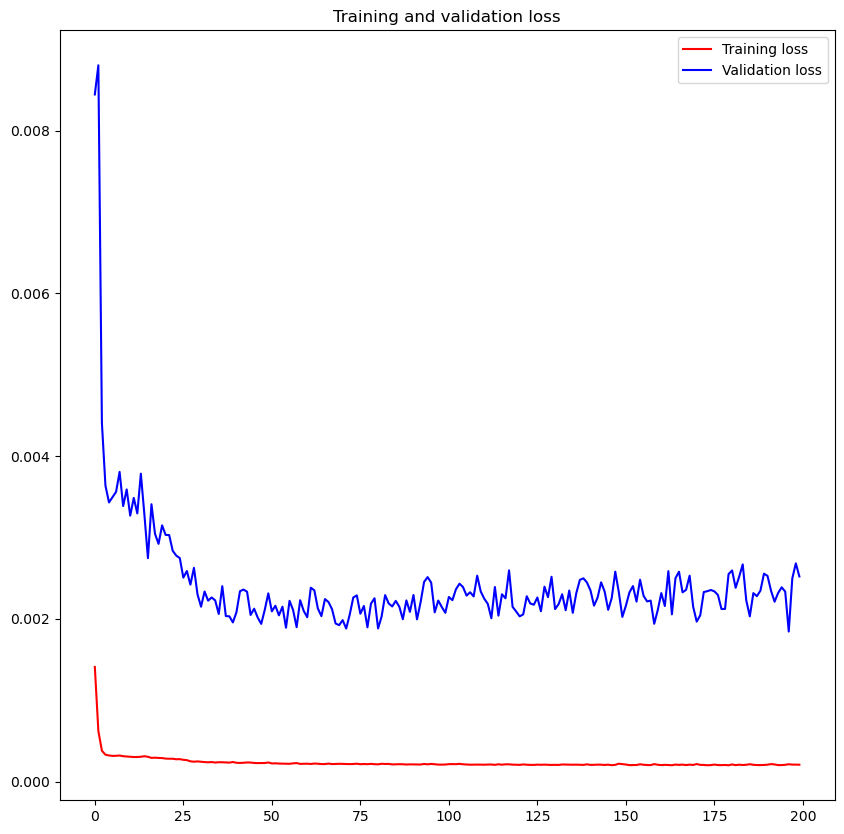

<Figure size 1000x1000 with 0 Axes>

In [22]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [23]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

7/7 [==============================] - 0s 2ms/step


((504, 1), (213, 1))

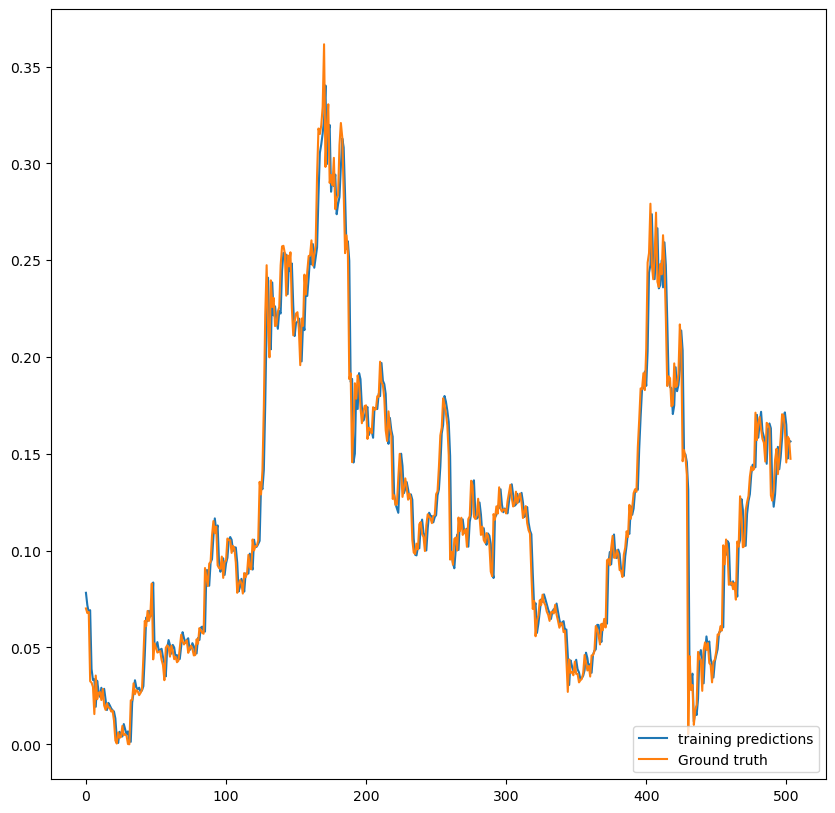

In [24]:
# Model's output on training data
plt.plot(train_predict)
plt.plot(y_train)
plt.legend(["training predictions", "Ground truth"], loc ="lower right") 

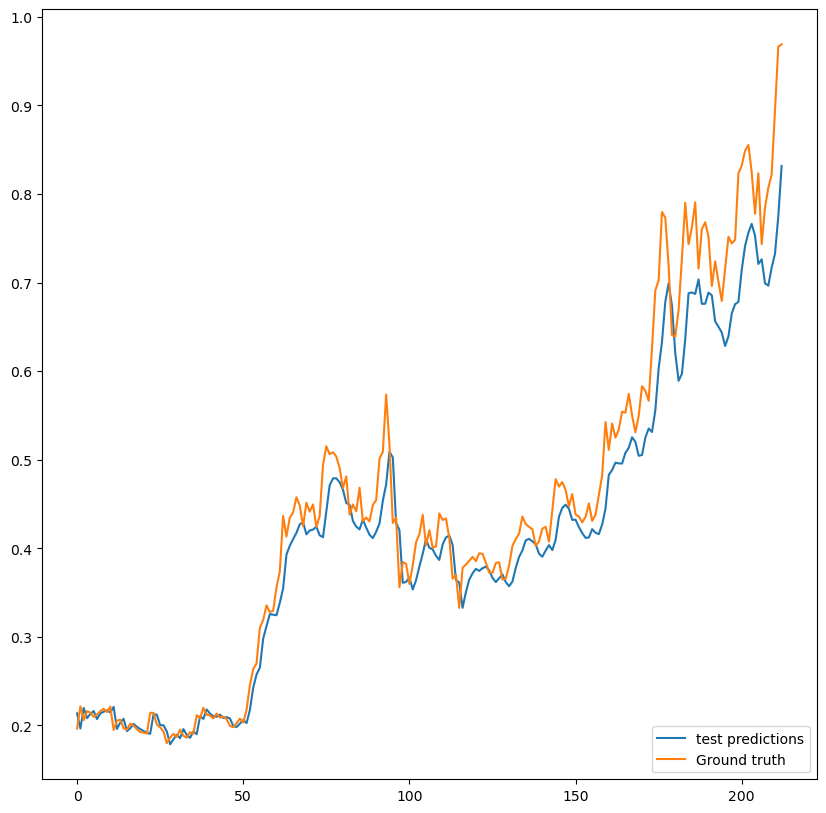

In [25]:
# Model's output on the testing data
plt.plot(test_predict)
plt.plot(y_test)
plt.legend(["test predictions", "Ground truth"], loc ="lower right") 

In [26]:
# sns.lineplot( y= np.array(test_predict).flatten(), x = dataset2.iloc[training_size + 11 :len(dataset3),0]